
# Project: No-show appointments

## Table of Contents
<ul><h3>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</h3></ul>

<a id='intro'></a>
## Introduction
This dataset collects information from over 100k medical appointments in Brazil with some characteristics like :

<li> contain information about patient age ,Scholarship of Bolsa Família,Hipertension status,Diabetes status and Alcoholism status.

### Question(s) for Analysis

<li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



<a id='wrangling'></a>
## Data Wrangling
In this section, let's check data quality in some aspects like (validity, accuracy, completeness, consistency, and uniformity)
in fore steps:
<li><a href="#assess">assessing</a></li>
<li><a href="#clen">cleaning</a></li>
<li><a href="#verf">verifying</a></li>
<li><a href="#report">reporting</a></li>

<a id='assess'></a> 
### Assessing
 In this section,let's check some data quality aspects as:

In [678]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
#loading dataset
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#identify shape and display some data 
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Profiling

In [679]:
# Data-Type Constraints:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [680]:
#Unique Constraints:if there is column must be unique
df['AppointmentID'].is_unique
#perfect

True

In [681]:
#Set-Membership constraints:if there is column must have value come from a set of discrete values, e.g. enum values
print(df['Gender'].unique())
print(df['Scholarship'].unique())
print(df['Hipertension'].unique())
print(df['Diabetes'].unique())
print(df['Alcoholism'].unique())
print(df['Handcap'].unique())
print(df['SMS_received'].unique())
print(df['No-show'].unique())
#perfect

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


In [682]:
#searsh for duplicated rows
df.duplicated().sum()

0

In [683]:
# identify some measurements
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data visualization

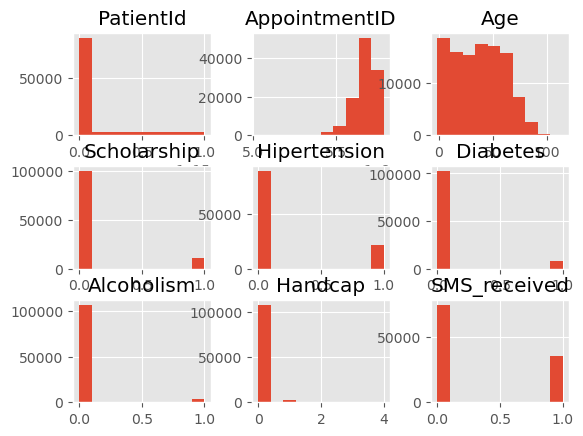

In [684]:
df.hist();

#### observations 
<li> there is no null values.
<li> there is no dublicated rows.
<li> columns(PatientId and AppointmentID) must have string type.
<li> column(age) have invalid values (-1) need to removed row_index=99832 
<li> columns(AppointmentDay and ScheduledDay) must have datetime type.

<a id='clen'></a>
###  Cleaning 
in this section, we change, edit, remove or rebuild data to meet the requirements of the analysis

In [685]:
#first let's standardize columns' names to lowercase with an underscore 
cls=df.columns.to_list()
for c in range(len(cls)) :
    cls[c]=cls[c].lower()
df.columns=cls   
df.rename(columns = {'patientid':'patient_id','appointmentid':'appointment_id','scheduledday': 'scheduled_day',
  'appointmentday': 'appointment_day','hipertension': 'hypertension','handcap':'handicap','no-show':'no_show'}, inplace = True)

In [686]:
#remove out of range values
df.drop(99832,inplace=True)

In [687]:
#change values of (no_show) as 1 for Yes,0 for No
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)

In [688]:
# change type of some columns to string.
def tostr(cl):
    df[cl]=df[cl].astype(str)
for x in ['appointment_id','patient_id','handicap','hypertension','scholarship','diabetes','alcoholism','sms_received']:
    tostr(x)
#df.patient_id=df.patient_id.astype(str)
#df.appointment_id=df.appointment_id.astype(str)

In [689]:
#convert type of appointment day and scheduled day to datetime then create column(waiting_days) 
df.appointment_day = pd.to_datetime(df.appointment_day).dt.date
df.scheduled_day = pd.to_datetime(df.scheduled_day).dt.date
df.appointment_day = pd.to_datetime(df.appointment_day)
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df['waiting_days']=(df['appointment_day']-df['scheduled_day'])/ np.timedelta64(1, 'D')
df['waiting_days']=df['waiting_days'].astype(int)

In [690]:
# remove 5 rows that contain appointment day before schedule day 
df_error=df[df['waiting_days']<0]
df.drop(df_error.index,inplace=True)

In [691]:
#creat column 'waiting_period'
df['waiting_period']=pd.cut(df['waiting_days'],[-1,0,10,30,60,300],labels=['0','1:10','10:30','30:60','>60'])

In [692]:
#creat column 'day_of_week'
df['day_of_week']=df.appointment_day.dt.day_name()

In [693]:
#creat column 'age_groups'
df['age_groups']=pd.cut(df['age'],[0, 2, 18, 40, 70,120],labels=['infants','children','youth','old','very old'])

In [694]:
#split data to who show and who not show
show_df=df.query('no_show==0')
no_show_df=df.query('no_show==1')

<a id='verf'></a>
### verify

In [695]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,waiting_period,day_of_week,age_groups
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,0,Friday,old
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0,Friday,old
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,0,Friday,old
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,0,Friday,children
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,0,Friday,old


In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110521 non-null  object        
 1   appointment_id   110521 non-null  object        
 2   gender           110521 non-null  object        
 3   scheduled_day    110521 non-null  datetime64[ns]
 4   appointment_day  110521 non-null  datetime64[ns]
 5   age              110521 non-null  int64         
 6   neighbourhood    110521 non-null  object        
 7   scholarship      110521 non-null  object        
 8   hypertension     110521 non-null  object        
 9   diabetes         110521 non-null  object        
 10  alcoholism       110521 non-null  object        
 11  handicap         110521 non-null  object        
 12  sms_received     110521 non-null  object        
 13  no_show          110521 non-null  int32         
 14  waiting_days     110

In [697]:
df.describe()

,age,no_show,waiting_days
count,110521.000000,110521.000000,110521.000000
mean,37.089386,0.201898,10.184345
std,23.109885,0.401419,15.255153
min,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,4.000000
75%,55.000000,0.000000,15.000000
max,115.000000,1.000000,179.000000


<a id='report'></a>
### Data Wrangling report
based on the assessment and requirements for analysis some  changes had performed as : 
<li>standardize columns' names to lowercase with an underscore 
<li>drop record '99832' which have out of range value(age=-1)
<li>change values of (no_show) as Yes to 1,No to 0
<li>change type of some columns to string
<li>converted the type of appointment day and scheduled day to DateTime then created a column(waiting_days) as the difference between them
<li>removed 5 rows that contain appointment day before the scheduled day 
<li>created column 'waiting_period' to calculate the period between the appointment day and the scheduled day
<li>created column 'age_group' to categorize old
<li>created column 'day_of_week' as day name
<li>split data to who show and who not show

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?!)
<li>let's explore relation between one variable and show_case in the following cells

In [698]:
# let's create a function to visualize and describe the effect of one variable on show status
def describeandvisualise(var1,x_lbl,y_lbl,t_lbl,w,h,ss=.2):
    total_var=df.groupby(var1)[var1].count()
    show_var=show_df.groupby(var1)[var1].count()
    no_show_var=no_show_df.groupby(var1)[var1].count()
    
    main_df=pd.DataFrame({'total':total_var,'show':show_var,'no_show':no_show_var})
    main_df.fillna(0,inplace=True)
    main_df['%show']=main_df['show']/main_df['total']*100
    main_df.sort_values('total',inplace=True,ascending=False)
    
    #build bar chart to visualize show based on neighbourhood
    style.use('ggplot')
    plt.figure(figsize=(w,h))
    plt.bar(main_df['total'].index.to_list(),main_df['total'].values.tolist(),width=ss,label='total');
    plt.bar(main_df['total'].index.to_list(),main_df['show'].values.tolist(),width=ss,label='show');
    plt.bar(main_df['total'].index.to_list(),main_df['no_show'].values.tolist(),width=ss,label='no_show');
    plt.ylabel(y_lbl)
    plt.xlabel(x_lbl)
    plt.title(t_lbl);
    plt.legend()
    
    return main_df

,total,show,no_show,%show
gender,,,,
F,71836,57245,14591,79.688457
M,38685,30962,7723,80.036190


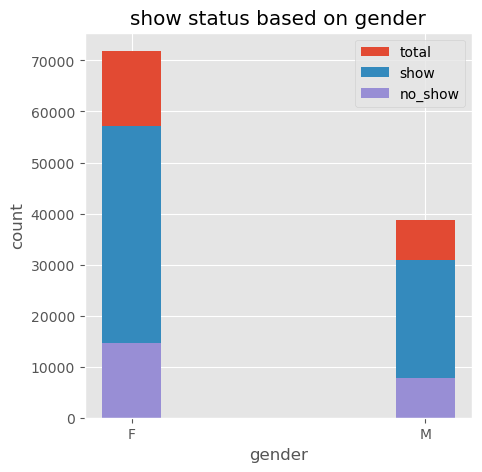

In [699]:
# show based on gender
describeandvisualise('gender','gender','count','show status based on gender',5,5)


the percentage of show likely to be the same (80%)

,total,show,no_show,%show
age_groups,,,,
old,41270,34031,7239,82.459414
youth,31814,24442,7372,76.827812
children,21435,16395,5040,76.487054
very old,8572,7215,1357,84.169389
infants,3891,3224,667,82.857877


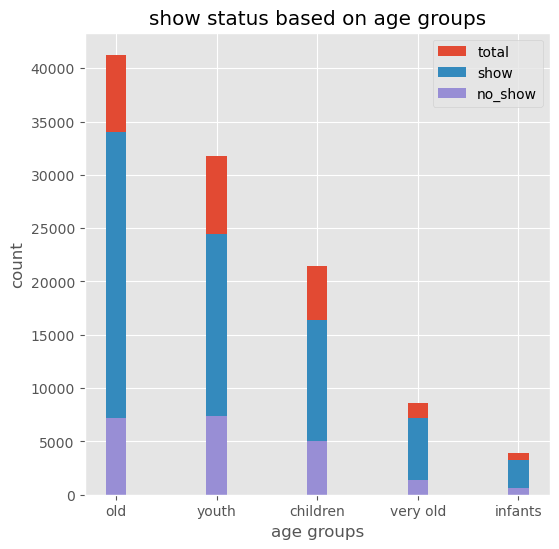

In [700]:
# show based on age groups
describeandvisualise('age_groups','age groups','count','show status based on age groups',6,6)


the percentage of show at range of 76.5% to 84% ,out of our expectation

,total,show,no_show,%show
neighbourhood,,,,
JARDIM CAMBURI,7717,6252.0,1465.0,81.015939
MARIA ORTIZ,5805,4586.0,1219.0,79.000861
RESISTÊNCIA,4430,3525.0,905.0,79.571106
JARDIM DA PENHA,3877,3246.0,631.0,83.724529
ITARARÉ,3514,2591.0,923.0,73.733637
...,...,...,...,...
ILHA DO BOI,35,32.0,3.0,91.428571
ILHA DO FRADE,10,8.0,2.0,80.000000
AEROPORTO,8,7.0,1.0,87.500000


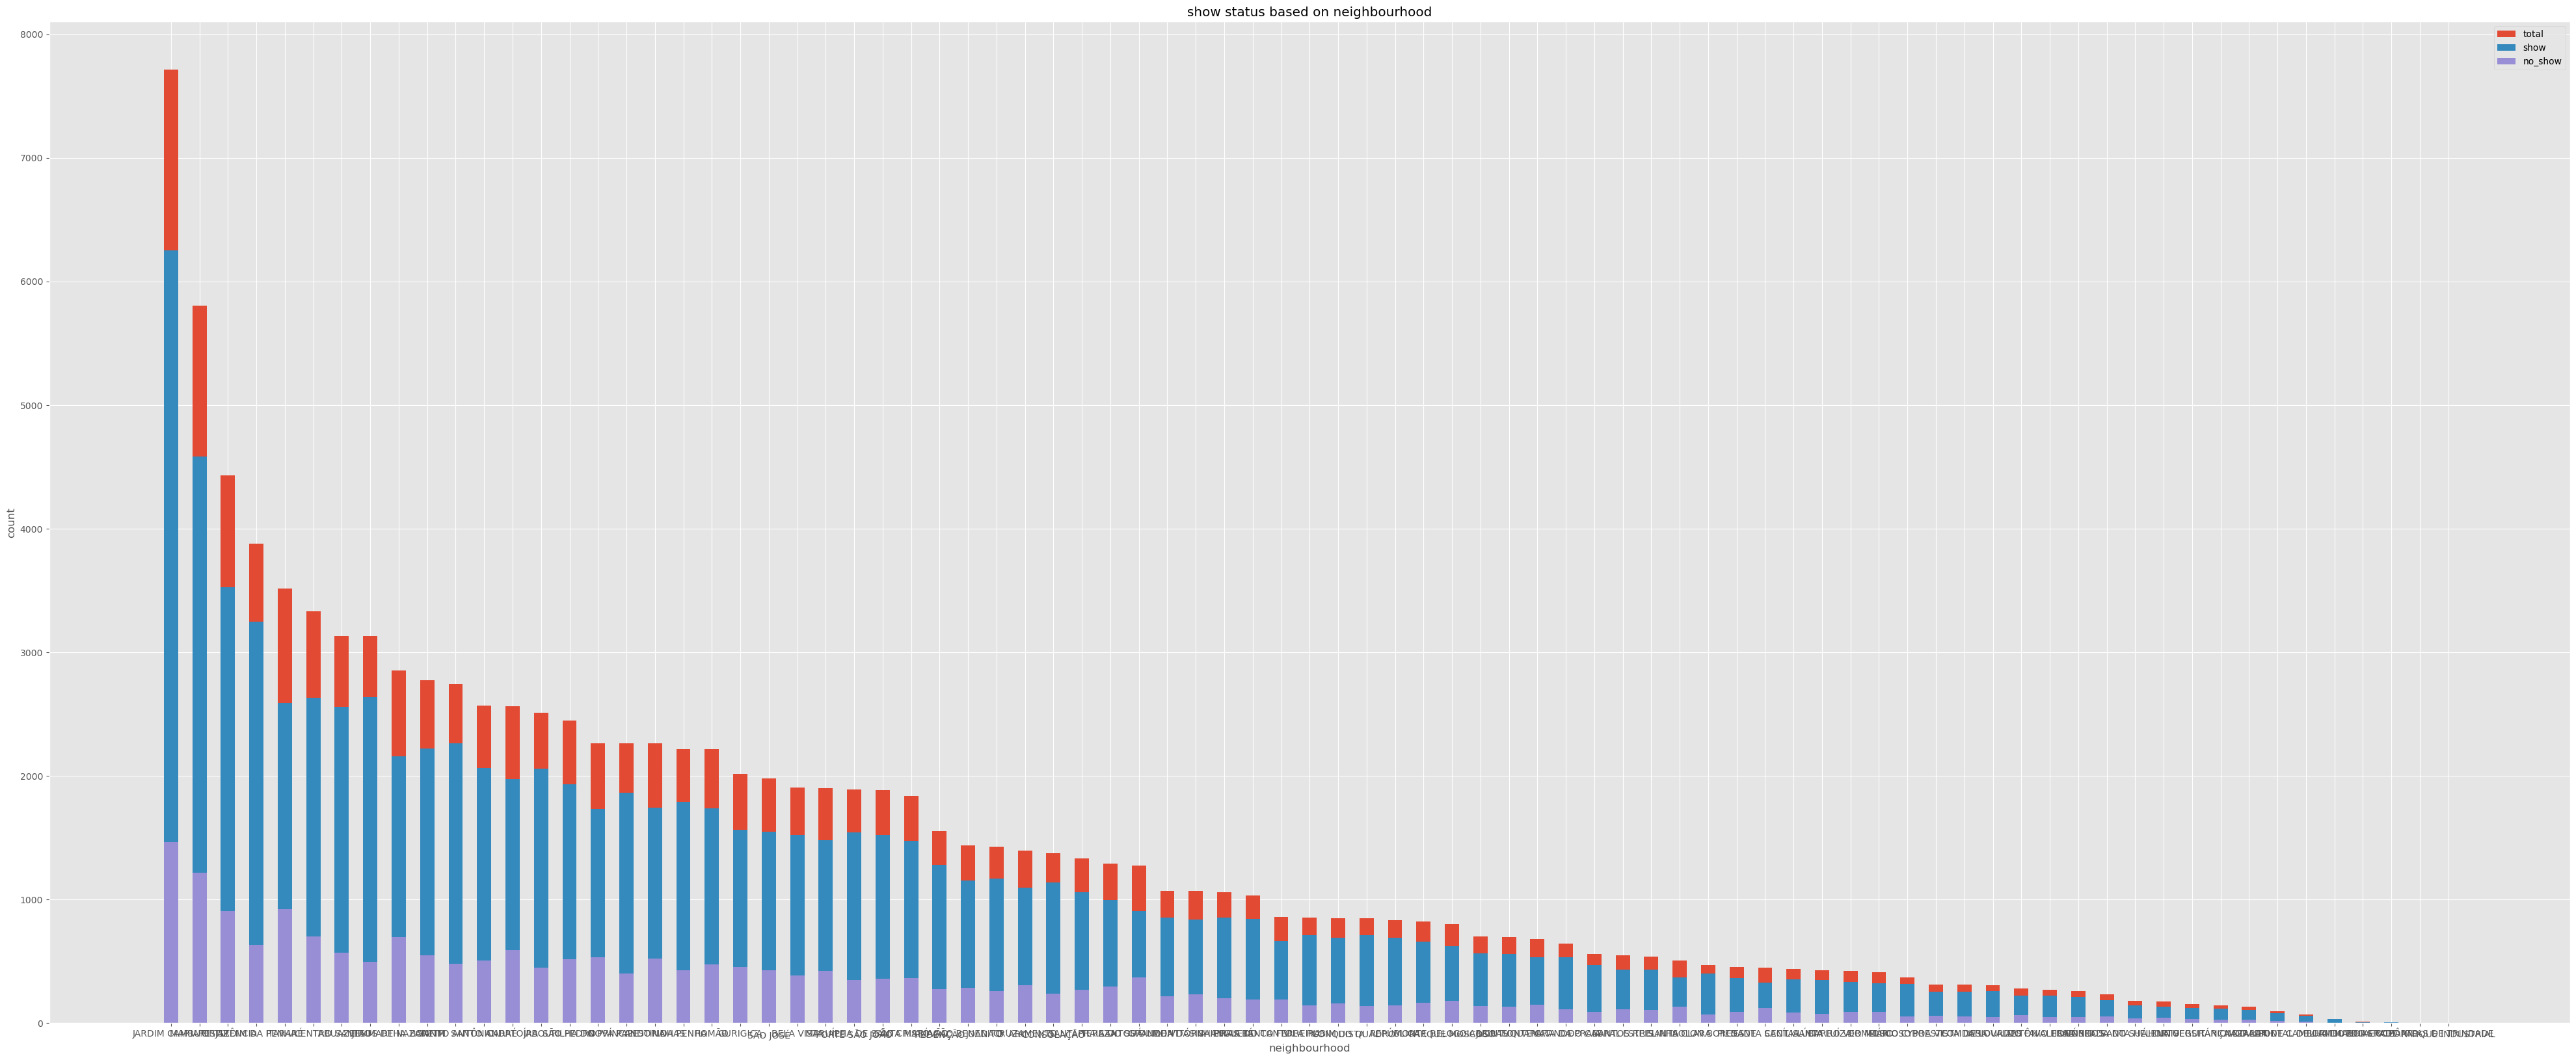

In [701]:
# show based on neighbourhood
describeandvisualise('neighbourhood','neighbourhood','count','show status based on neighbourhood',50,20,.5)

in the neibourhoods that have big number of total appointment,the show percentage is around 80%.
let's ignore the neibourhoods that have small number of total appointment.

,total,show,no_show,%show
handicap,,,,
0,108282,86373,21909,79.766720
1,2040,1676,364,82.156863
2,183,146,37,79.781421
3,13,10,3,76.923077
4,3,2,1,66.666667


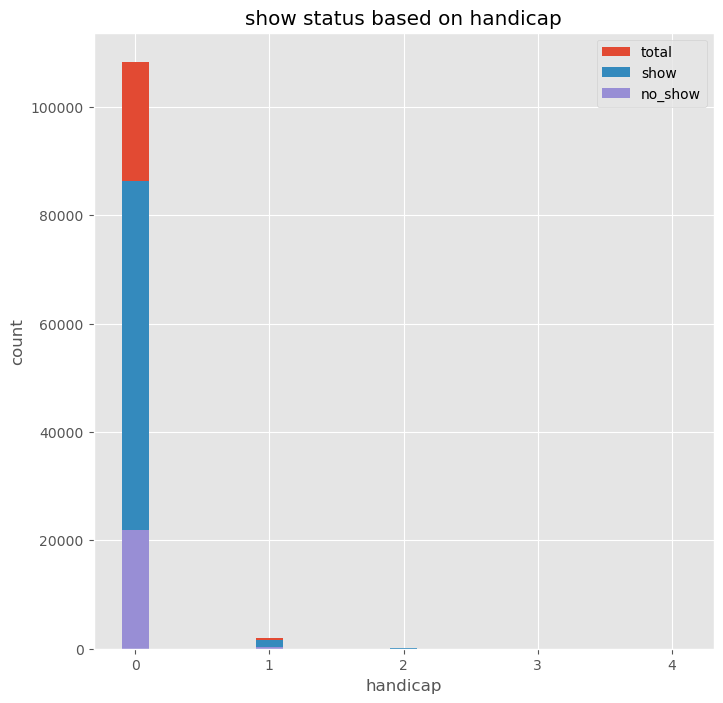

In [702]:
# show based on handicap status
describeandvisualise('handicap','handicap','count','show status based on handicap',8,8)

the percentage of show at range of 67% to 82% with no importance where most patient weren't handicap

,total,show,no_show,%show
day_of_week,,,,
Wednesday,25866,20774,5092,80.313926
Tuesday,25638,20488,5150,79.912630
Monday,22713,18024,4689,79.355435
Friday,19019,14982,4037,78.773858
Thursday,17246,13909,3337,80.650586
Saturday,39,30,9,76.923077


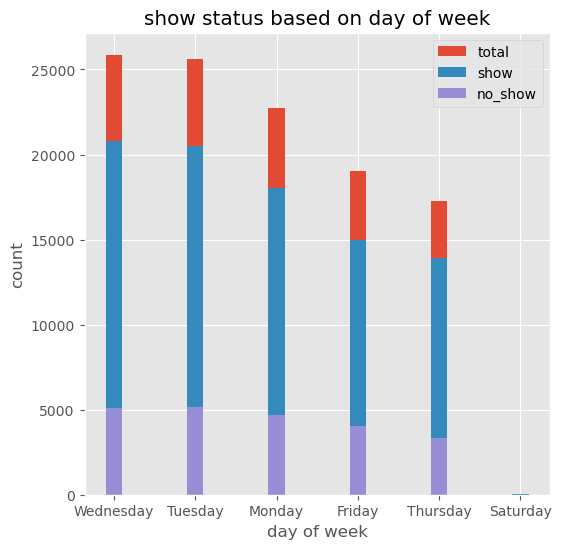

In [703]:
# show based on day of week
describeandvisualise('day_of_week','day of week','count','show status based on day of week',6,6)

the percentage of show at range of 77% to 80.5% ,seem to be the same

,total,show,no_show,%show
waiting_period,,,,
0,38562,36770,1792,95.352938
1:10,37513,28191,9322,75.149948
10:30,24068,16293,7775,67.695696
30:60,8283,5454,2829,65.845708
>60,2095,1499,596,71.551313


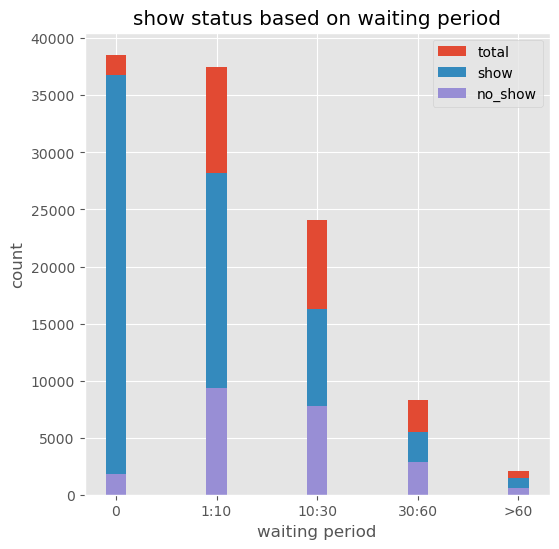

In [704]:
# show based on waiting_period
describeandvisualise('waiting_period','waiting period','count','show status based on waiting period',6,6)

based on waiting period, the percentage of show at range of 66% to 95.5% ,that may be the most factor affects show status where schedule  and appointment at one day 

,total,show,no_show,%show
scholarship,,,,
0,99660,79924,19736,80.196669
1,10861,8283,2578,76.263696


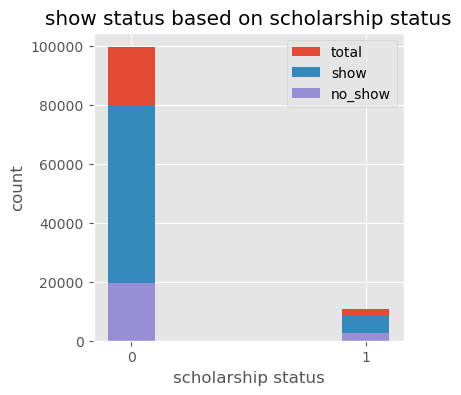

In [705]:
# show based on scholarship
describeandvisualise('scholarship','scholarship status','count','show status based on scholarship status',4,4)

expected that the patient who enorolled in scholarship are more commetted to show, anyway this factor isn't our important factor

,total,show,no_show,%show
sms_received,,,,
0,75039,62509,12530,83.302016
1,35482,25698,9784,72.425455


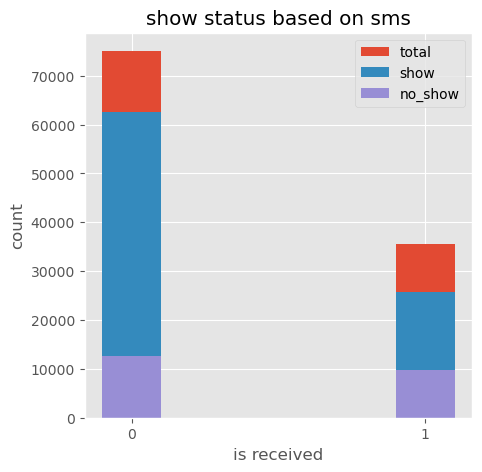

In [706]:
# show based on sms
describeandvisualise('sms_received','is received','count','show status based on sms',5,5)

this factor depend on waiting period,where there is no message sent to patient if waiting period=0(in same day)

,total,show,no_show,%show
alcoholism,,,,
0,107161,85524,21637,79.808886
1,3360,2683,677,79.851190


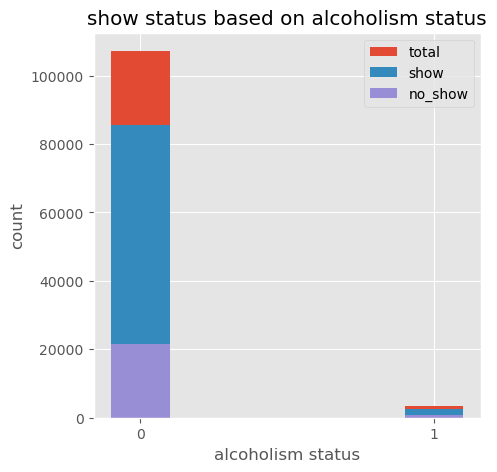

In [707]:
# show based on alcoholism status
describeandvisualise('alcoholism','alcoholism status','count','show status based on alcoholism status',5,5)

seem to be the same show percentage

,total,show,no_show,%show
diabetes,,,,
0,102578,81694,20884,79.640859
1,7943,6513,1430,81.996727


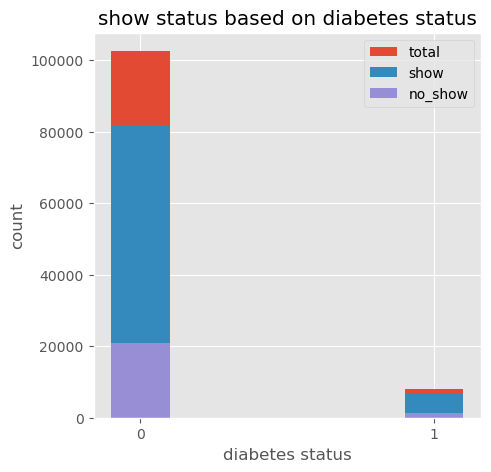

In [708]:
# show based on diabetes status
describeandvisualise('diabetes','diabetes status','count','show status based on diabetes status',5,5)

show percentage seem to be the same 

,total,show,no_show,%show
hypertension,,,,
0,88720,70178,18542,79.100541
1,21801,18029,3772,82.698041


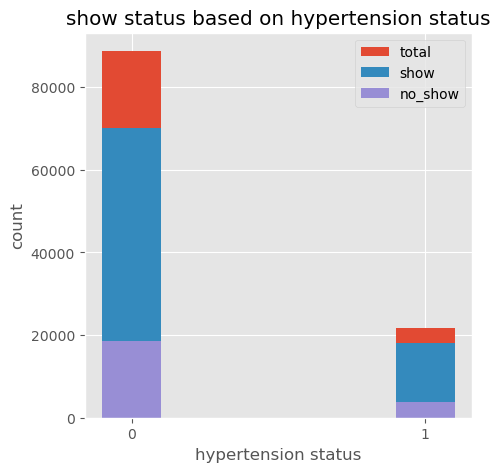

In [709]:
# show based on hypertension status
describeandvisualise('hypertension','hypertension status','count','show status based on hypertension status',5,5)

 show percentage seem to be the same

<a id='conclusions'></a>
## Conclusions

based on exploration performed above we can summarize the following

<li>the effect of most variables is limited, where the percentage of patients who had shown still around 80%</li>

<li>In answer to our question the most factor are important for us to know to predict if a patient will show up for their scheduled appointment is the period between the appointment date and the scheduled date where we notice that if period =0(or appointment day and the scheduled day is the same) since the percentage become more than 95%</li>



## limitations
<li>with data like this, it's more difficult to find more statistics and correlation between most factors and show status, where the type of data is categorical
